# Question 1

In [5]:
from scipy.stats import dweibull as dw
%matplotlib inline
%pylab inline
import numpy as np
from ipywidgets import interact,IntSlider, FloatSlider
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [155]:
def dwe_fun(c):
    rv=dw(c)
    x=np.linspace(rv.ppf(0.00001),rv.ppf(0.99999),500)
    figure(figsize=(20,10))
    subplot(2,2,1)
    plt.plot(x,rv.pdf(x),linewidth=2)
    plt.title("PDF"),plt.xlabel("X-axis"),plt.ylabel("f(x)")
    subplot(2,2,2)
    plt.plot(x,rv.cdf(x),'r',linewidth=2)
    plt.title("CDF"),plt.xlabel("X-axis"),plt.ylabel("F(x)")
    subplot(2,2,3)
    plt.plot(x,rv.pdf(x),linewidth=2,label="PDF")
    plt.legend(loc="best")
    plt.plot(x,rv.cdf(x),linewidth=2,label="CDF")
    plt.legend(loc="best")
    plt.xlabel("X-axis")
    plt.ylabel("f(x) and F(x)")

In [156]:
interact(dwe_fun,c=(0.01,10));
#for selecting a particular value of c i used the interact widgets

interactive(children=(FloatSlider(value=5.005, description='c', max=10.0, min=0.01), Output()), _dom_classes=(…

In [8]:
c=2.91
mean, var = dw.stats(c, moments='mv')
print('mean = '+str(mean))
print('variance ='+str(var))

mean = 0.0
variance =0.9062908391713889


# Question 2

In [9]:
c=2.91
def mean_dw(n):
    mean=np.mean(dw.rvs(c,size=n))
    return mean

In [10]:
#for finding different samples of the sample mean
def different_mean(m,n):
    sample = np.zeros(m)
    for i_sample in range(m):
        sample[i_sample]=mean_dw(n)
    return sample    

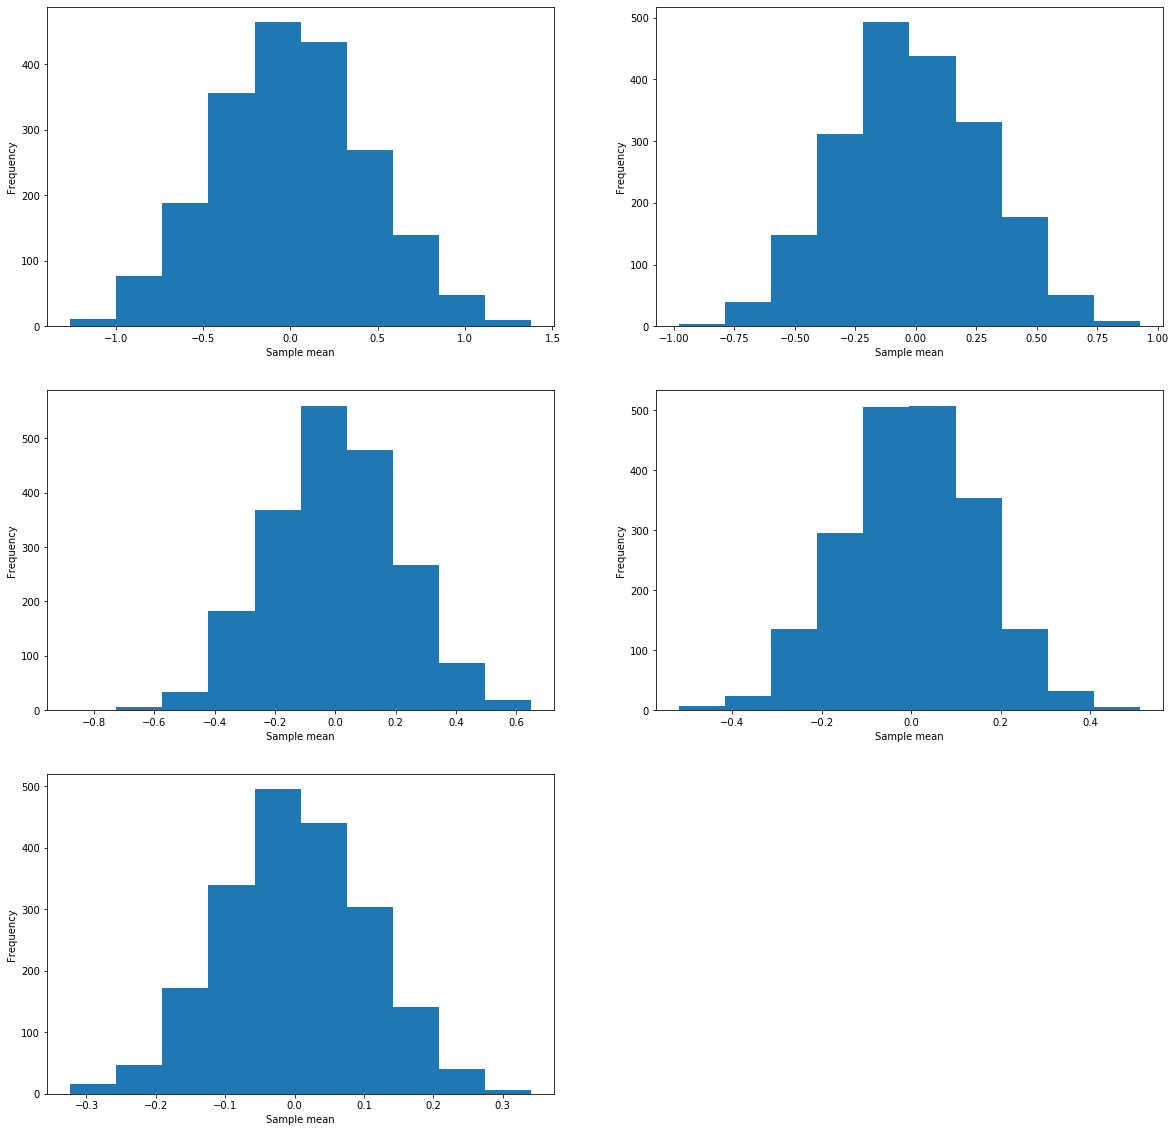

In [145]:
figure(figsize=(20,20))
subplot(3,2,1)
plt.xlabel('Sample mean') 
plt.ylabel('Frequency')
plt.hist(different_mean(2000,5));
subplot(3,2,2)
plt.xlabel('Sample mean') 
plt.ylabel('Frequency')
plt.hist(different_mean(2000,10));
subplot(3,2,3)
plt.xlabel('Sample mean') 
plt.ylabel('Frequency')
plt.hist(different_mean(2000,20));
subplot(3,2,4)
plt.xlabel('Sample mean') 
plt.ylabel('Frequency')
plt.hist(different_mean(2000,40));
subplot(3,2,5)
plt.xlabel('Sample mean') 
plt.ylabel('Frequency')
plt.hist(different_mean(2000,80));

In [12]:
#for finding the standard deviation of the sample mean
def std_sample(m,n):
    sample_std=np.zeros(n)
    for i in np.arange(1,n+1):
        sample_std[i-1]=np.std(different_mean(m,i))
    return sample_std

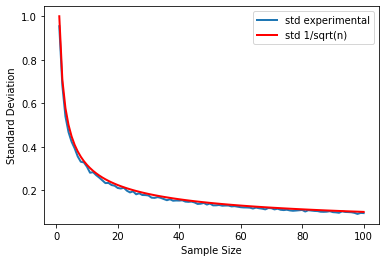

In [133]:
m=1000
n=100
x=np.arange(1,n+1)
plt.plot(x,std_sample(m,n),linewidth=2,label="std experimental")
plt.legend(loc="best")
plt.plot(x,1/(sqrt(x)),'r',linewidth=2,label="std 1/sqrt(n)")
plt.legend(loc="best")
plt.xlabel("Sample Size")
plt.ylabel("Standard Deviation")
plt.show()

In [153]:
from scipy.stats import t, norm
a=400
m=2000
n=100
Z_values=np.zeros(a)
def Z_calculation(n,c):
    def mean_dw(n):
        mean=np.mean(dw.rvs(c,size=n))
        return mean
    def different_mean(m,n):
        sample = np.zeros(m)
        for i_sample in range(m):
            sample[i_sample]=mean_dw(n)
        return sample    
    sample=different_mean(m,n)
    mu=np.mean(sample)
    S=np.std(sample,ddof=1)
    for i in range(a):
        z=mean_dw(n)
        Z=(z-mu)/S
        Z_values[i]=Z
    rv = t(n-1)
    x = np.linspace(-5, 5, 200)
    plt.plot(x, norm.pdf(x), 'b--',lw=3,label="Normal Distribution")
    plt.legend(loc='best')
    plt.plot(x, rv.pdf(x),'r',lw=3,label="T Disrtibution")
    plt.legend(loc='best')
    n_hist = 20
    x_lo = -3.5
    x_hi = 3.5
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f$') 
    dx = (x_hi - x_lo)/n_hist
    x_hist = np.linspace(x_lo, x_hi, (n_hist + 1), endpoint=True)
    plt.hist(Z_values, bins=x_hist,color='g', weights=np.ones_like(Z_values)/(Z_values.size*dx));
#needed to add everything in one function to make it interactable    

In [154]:
interact(Z_calculation,n=IntSlider(min=2,max=100, value = 50),c=FloatSlider(min= 0.1,max=10,value=2.91))

interactive(children=(IntSlider(value=50, description='n', min=2), FloatSlider(value=2.91, description='c', ma…

<function __main__.Z_calculation(n, c)>